# Abalone Age Prediction

# Know Your Data

# Import Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

# Load Dataset

In [4]:
url = 'http://archive.ics.uci.edu/static/public/1/data.csv'
df = pd.read_csv(url)
print(df.head())

  Sex  Length  Diameter  Height  Whole_weight  Shucked_weight  Viscera_weight  \
0   M   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   M   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   F   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   M   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   I   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   Shell_weight  Rings  
0         0.150     15  
1         0.070      7  
2         0.210      9  
3         0.155     10  
4         0.055      7  


In [56]:
#...Other Method...#

#column_names = ["sex", "length", "diameter", "height", "whole weight", 
#                "shucked weight", "viscera weight", "shell weight", "rings"]
#df = pd.read_csv("C:/Users/Sony/Downloads/abalone/abalone.data", names=column_names)

# Dataset First View

In [5]:
df.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


# Ask Six Questions Before moving forward

In [6]:
df.shape

(4177, 9)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole_weight    4177 non-null   float64
 5   Shucked_weight  4177 non-null   float64
 6   Viscera_weight  4177 non-null   float64
 7   Shell_weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [8]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [12]:
df.describe()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


# Encoding

In [13]:
df['Sex'].value_counts()

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

In [14]:
df['Sex'] = df['Sex'].map({"M":0,"F":1,"I":2})

In [15]:
df['Sex'].value_counts()

0    1528
2    1342
1    1307
Name: Sex, dtype: int64

# EDA ( Exploratory data Analysis)

In [17]:
corr = df.corr()

<Axes: >

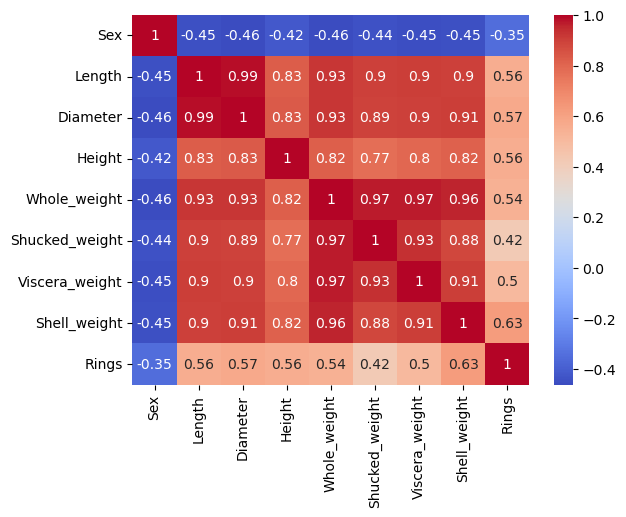

In [18]:
sns.heatmap(corr,annot=True,cbar=True,cmap='coolwarm')
#sns.heatmap(corr,annot=True,cbar=True,cmap='Greens')

<Axes: xlabel='Rings', ylabel='Count'>

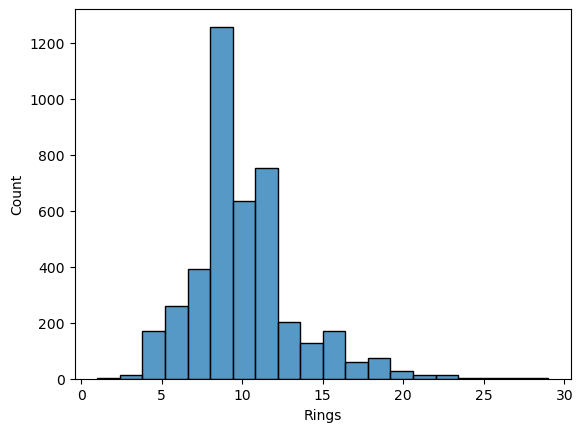

In [19]:
sns.histplot(df['Rings'],bins=20)

In [20]:
df['Rings'].value_counts()

9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
1       1
26      1
29      1
2       1
25      1
Name: Rings, dtype: int64

# Scatter plot of length vs age

<Axes: xlabel='Length', ylabel='Rings'>

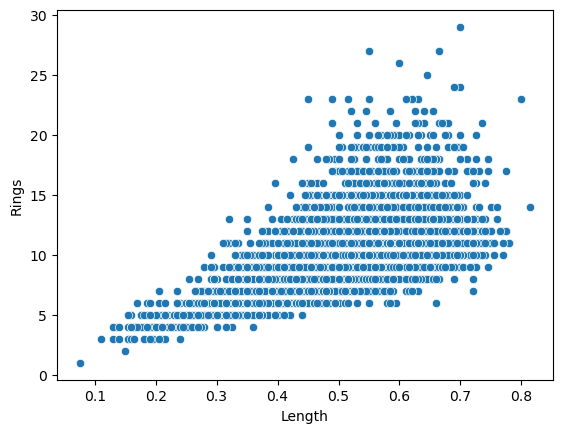

In [21]:
sns.scatterplot(x='Length',y='Rings',data=df)

# Train Test Split

In [22]:
x = df.drop('Rings',axis=1)
y = df['Rings']

#Other Method
#x = df.iloc[:,:-1]
#y = df.iloc[:,-1]

In [23]:
x.shape

(4177, 8)

In [24]:
y.shape

(4177,)

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [27]:
x_test.shape #20% Use

(836, 8)

In [28]:
x_train.shape #80% Use

(3341, 8)

In [29]:
y_test.shape #20% Use

(836,)

In [30]:
y_train.shape #80% Use

(3341,)

# Standarization the data

In [31]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train_scaled = sc.fit_transform(x_train)
x_test_scaled = sc.transform(x_test)

In [32]:
x_test_scaled

array([[-1.15518338,  0.67189513,  0.47107108, ...,  0.27104784,
         1.10272193,  0.60976664],
       [-1.15518338,  0.54597132,  0.31905249, ...,  0.11857068,
         0.31224199,  0.03801081],
       [ 0.05278772,  0.29412372,  0.36972535, ..., -0.24916836,
         0.39905771,  0.68123611],
       ...,
       [ 1.26075882,  0.16819992,  0.21770676, ..., -0.03614879,
        -0.20865231, -0.22642626],
       [ 1.26075882, -0.50339368, -0.5423862 , ..., -0.47339947,
        -0.81636232, -0.39795301],
       [ 1.26075882, -1.34288568, -1.35315201, ..., -1.17748518,
        -1.30984112, -1.17697032]])

# Training Models

In [33]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [34]:
best_model = None
best_mse = float('inf')

In [38]:
# Define a list of models to train and compare
models = [
    ('Linear Regression', LinearRegression()),
    ('Ridge Regression', Ridge()),
    ('Lasso Regression', Lasso()),
    ('Decision Tree', DecisionTreeRegressor(random_state=42)),
    ('Random Forest', RandomForestRegressor(random_state=42))
]

# Train and evaluate each model
for name, model in models:
    model.fit(x_train_scaled, y_train)
    y_pred = model.predict(x_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'{name}: Mean Squared Error (MSE) = {mse:.2f}, R2 = {r2:.2f}')

    if mse < best_mse:
        best_mse = mse
        best_model = models
print(best_model)

Linear Regression: Mean Squared Error (MSE) = 4.95, R2 = 0.54
Ridge Regression: Mean Squared Error (MSE) = 4.95, R2 = 0.54
Lasso Regression: Mean Squared Error (MSE) = 7.69, R2 = 0.29
Decision Tree: Mean Squared Error (MSE) = 8.94, R2 = 0.17
Random Forest: Mean Squared Error (MSE) = 5.07, R2 = 0.53
[('Linear Regression', LinearRegression()), ('Ridge Regression', Ridge()), ('Lasso Regression', Lasso()), ('Decision Tree', DecisionTreeRegressor(random_state=42)), ('Random Forest', RandomForestRegressor(random_state=42))]


In [39]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Define a list of models to train and compare
models = [
    ('Linear Regression', LinearRegression()),
    ('Ridge Regression', Ridge()),
    ('Lasso Regression', Lasso()),
    ('Decision Tree', DecisionTreeRegressor(random_state=42)),
    ('Random Forest', RandomForestRegressor(random_state=42))
]

best_model = None
best_mse = float('inf')

# Train and evaluate each model
for name, model in models:
    model.fit(x_train_scaled, y_train)
    y_pred = model.predict(x_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'{name}: Mean Squared Error (MSE) = {mse:.2f}, R2 = {r2:.2f}')

    if mse < best_mse:
        best_mse = mse
        best_model = model

print("Best Model:", best_model)


Linear Regression: Mean Squared Error (MSE) = 4.95, R2 = 0.54
Ridge Regression: Mean Squared Error (MSE) = 4.95, R2 = 0.54
Lasso Regression: Mean Squared Error (MSE) = 7.69, R2 = 0.29
Decision Tree: Mean Squared Error (MSE) = 8.94, R2 = 0.17
Random Forest: Mean Squared Error (MSE) = 5.07, R2 = 0.53
Best Model: LinearRegression()


# Chosen Model

In [119]:
dtr = DecisionTreeRegressor()
dtr.fit(x_train_scaled, y_train)
y_pred = dtr.predict(x_test)
print(mean_squared_error(y_test, y_pred))
print(r2_score(y_test,y_pred))

18.571770334928228
-0.7156036933019778


In [42]:
lr = LinearRegression()
lr.fit(x_train_scaled, y_train)
y_pred = lr.predict(x_test)
print(mean_squared_error(y_test, y_pred))
print(r2_score(y_test,y_pred))

12.303417331393762
-0.13655229594762663


# Prediction System

In [122]:
def prediction_age(Sex,Length,Diameter,Height,Whole_weght,shucked_weght,visc_wet,shell_weight):
    features = np.array([[Sex,Length,Diameter,Height,Whole_weght,shucked_weght,visc_wet,shell_weight]])
    pred = dtr.predict(features).reshape(1,-1)  
    return pred[0]
Sex = 1
Length = 4.5
Diameter = 5.5
Height = 8.4
Whole_weght = 10.4
shucked_weght = 5.6
visc_wet = 7.2
shell_weight = 11.2

prediciton = prediction_age(Sex,Length,Diameter,Height,Whole_weght,shucked_weght,visc_wet,shell_weight)
if prediciton[0] == 0:
    print("{} is a Male".format(prediciton))
elif prediciton[0] == 1:
    print("{} is a Female".format(prediciton))
else:
    print("{} is a Ifant".format(prediciton))

[14.] is a Ifant


In [43]:
def prediction_age(Sex,Length,Diameter,Height,Whole_weght,shucked_weght,visc_wet,shell_weight):
    features = np.array([[Sex,Length,Diameter,Height,Whole_weght,shucked_weght,visc_wet,shell_weight]])
    pred = lr.predict(features).reshape(1,-1)  
    return pred[0]
Sex = 1
Length = 4.5
Diameter = 5.5
Height = 8.4
Whole_weght = 10.4
shucked_weght = 5.6
visc_wet = 7.2
shell_weight = 11.2

prediciton = prediction_age(Sex,Length,Diameter,Height,Whole_weght,shucked_weght,visc_wet,shell_weight)
if prediciton[0] == 0:
    print("{} is a Male".format(prediciton))
elif prediciton[0] == 1:
    print("{} is a Female".format(prediciton))
else:
    print("{} is a Ifant".format(prediciton))

[46.54405151] is a Ifant


In [88]:
import pickle

pickle.dump(dtr,open('model.pkl','wb'))